### 1. 여러개의 그래프

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

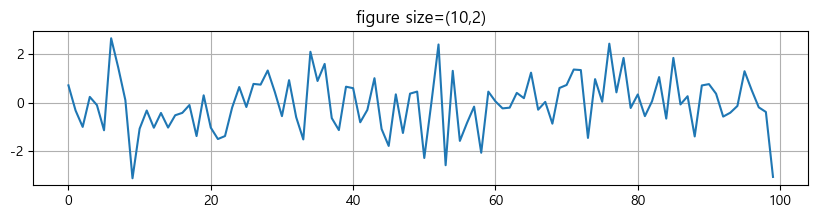

In [4]:
np.random.seed(2023)
plt.figure(figsize=(10,2))
plt.title('figure size=(10,2)')
plt.plot(np.random.randn(100)), plt.grid()
plt.show()

plt.figure
plt.scatter
plt.plot
plt.title
plt.grid



plt. show

<from PIL import Image>
plt.figure()
img=image.open()
plt.imshow()

- subplot()
    -   -    s붙인 복수형 'subplots()'는 특수한 경우만(스케일이 다른 두 개의 그래프를 겹쳐서 그릴 때) 사용

In [7]:
from PIL import Image
img1 = Image.open('data/output.png')
img2 = Image.open('data/삼각함수.png')

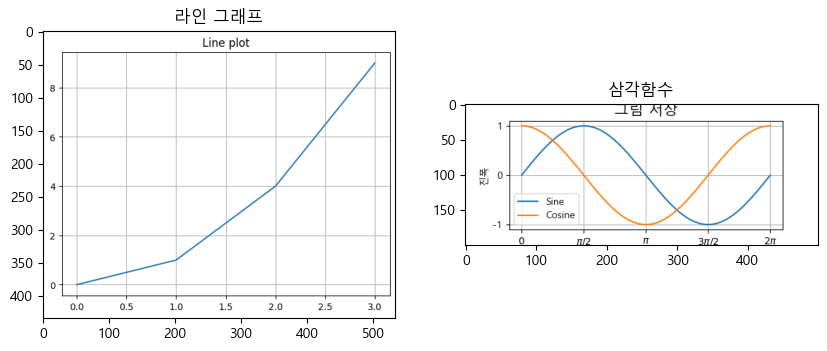

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)    # 행갯수, 열갯수, 순서(*1부터 시작. 0이아님)
plt.imshow(img1), plt.title('라인 그래프')
plt.subplot(122)        # = (1, 2, 2)
plt.imshow(img2), plt.title('삼각함수')
plt.show()

In [10]:
import seaborn as sns
ans =sns.load_dataset('anscombe')
ans.dataset.value_counts()  # 데이터 정보 확인

dataset
I      11
II     11
III    11
IV     11
Name: count, dtype: int64

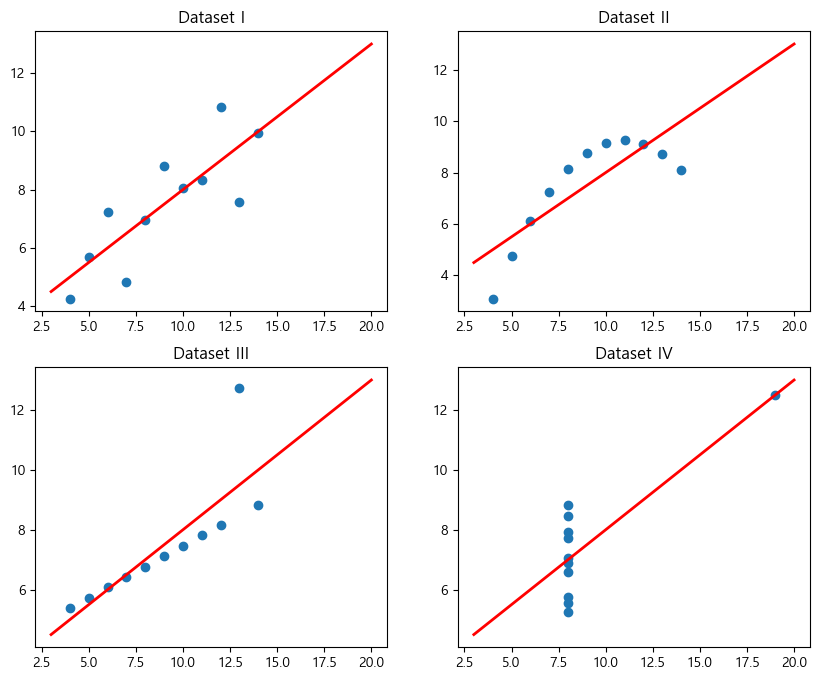

In [12]:
# lv.1 _ 기본
plt.figure(figsize=(10,8))

for index, roman in enumerate(ans.dataset.unique()):   # (I','II','III','IV')
    ds = ans[ans.dataset == roman]
    plt.subplot(2, 2, index+1)  # 1부터 시작하도록
    plt.scatter(ds.x, ds.y, marker='o')
    plt.plot([3,20], [4.5,13], 'r-', lw=2)     # y = 0.5 *x + 3
    plt.title(f'Dataset {roman}')
plt.show()

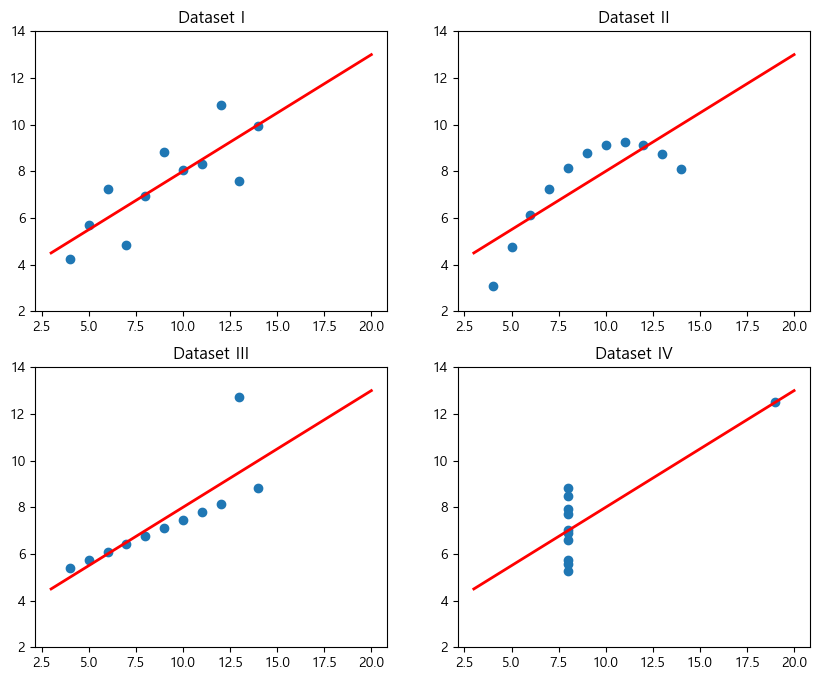

In [14]:
# lv.1 _기본+ ylim추가
plt.figure(figsize=(10,8))

for index, roman in enumerate(ans.dataset.unique()):   # (I','II','III','IV')
    ds = ans[ans.dataset == roman]
    plt.subplot(2, 2, index+1)  # 1부터 시작하도록
    plt.ylim(2,14)
    plt.scatter(ds.x, ds.y, marker='o')
    plt.plot([3,20], [4.5,13], 'r-', lw=2)     # y = 0.5 *x + 3
    plt.title(f'Dataset {roman}')
plt.show()

- subplots() : fig, axes 객체 사용
    -   전체 제목을 넣을 수 있음
    -   시각적으로 보기 좋아짐
    -   단점은 사용법이 조금 어렵다는 것

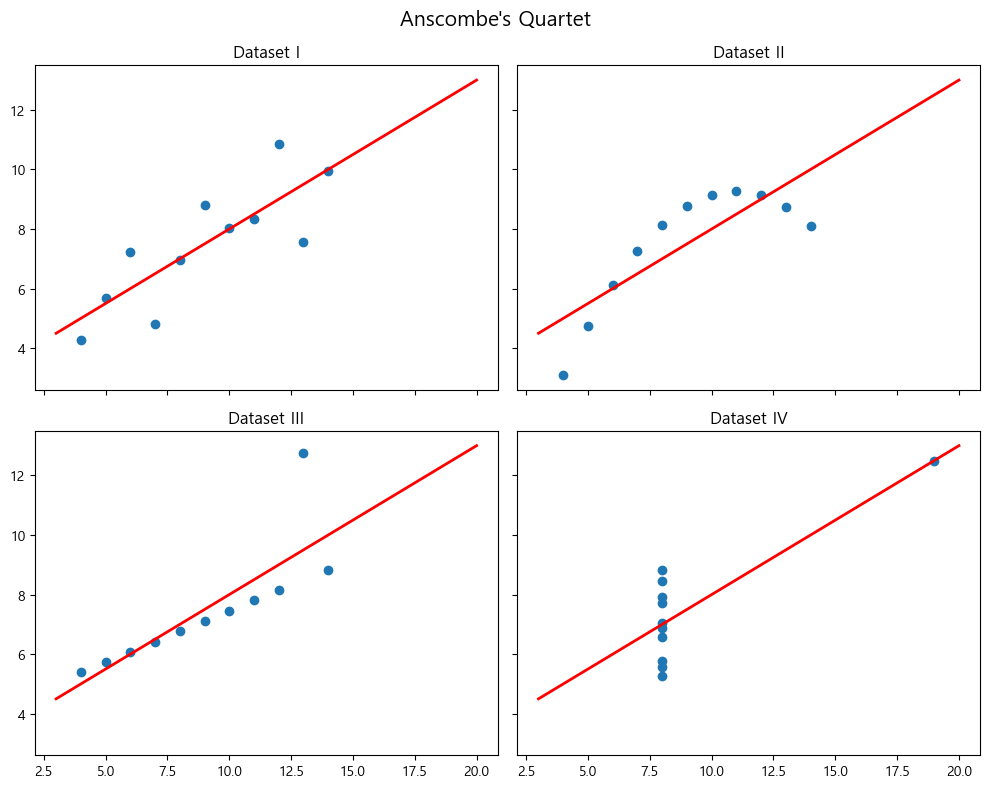

In [15]:
# lv.2
fig, axes= plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True) # row, col, , ,
for index, roman in enumerate(ans.dataset.unique()):   # (I','II','III','IV')
    ds = ans[ans.dataset == roman]
    ax = axes[index//2,index % 2]    # row index, column index
    ax.scatter(ds.x, ds.y, marker='o')
    ax.plot([3,20], [4.5,13], 'r-', lw=2)     # y = 0.5 *x + 3
    ax.set_title(f'Dataset {roman}')
    
fig.suptitle("Anscombe's Quartet", fontsize=15)
plt.tight_layout()
plt.show()

- Axis 객체와 축

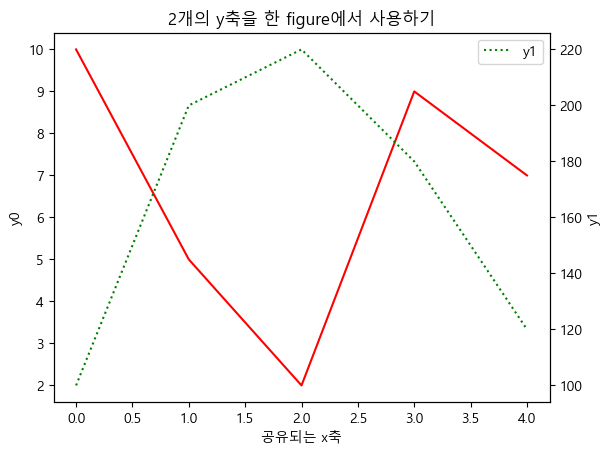

In [17]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.set_title("2개의 y축을 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax0.set_xlabel("공유되는 x축")
# plt.legend()
plt.show()

```
갤러리에 있는 그래프를 그려보세요 https://matplotlib.org/stable/gallery/index.html
```

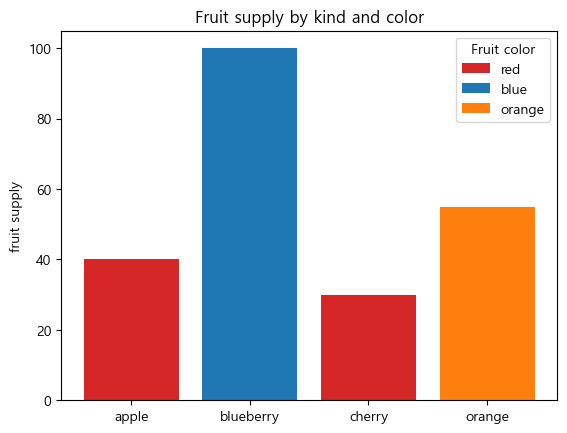

In [20]:
fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

plt.bar(fruits, counts, label=bar_labels, color=bar_colors)

plt.ylabel('fruit supply')
plt.title('Fruit supply by kind and color')
plt.legend(title='Fruit color')

plt.show()

``` Iris 모든 품종의 특성에 대한 박스플롯을 하나의 그래프 안에 그리기```

In [30]:
iris = sns.load_dataset('iris')
iris.value_counts()
# iris.head(10)

sepal_length  sepal_width  petal_length  petal_width  species   
5.8           2.7          5.1           1.9          virginica     2
6.2           2.2          4.5           1.5          versicolor    1
              2.9          4.3           1.3          versicolor    1
              3.4          5.4           2.3          virginica     1
6.3           2.3          4.4           1.3          versicolor    1
                                                                   ..
5.4           3.9          1.3           0.4          setosa        1
                           1.7           0.4          setosa        1
5.5           2.3          4.0           1.3          versicolor    1
              2.4          3.7           1.0          versicolor    1
7.9           3.8          6.4           2.0          virginica     1
Name: count, Length: 149, dtype: int64

In [ ]:
# 방법 1
plt.figure(figsize=(5,3))
for index, species in enumerate(iris.species.unique()):
    sl = iris[iris.species == species].sepal_length
    sw = iris[iris.species == species].sepal_width
    pl = iris[iris.species == species].petal_length
    pw = iris[iris.species == species].petal_width
    plt.subplot(1, 3, index+1)
    plt.boxplot((sl, sw, pl, pw),
                labels=['s_len', 's_wid', 'p_len', 'p_wid'])
    plt.title(species)
    
plt.show()

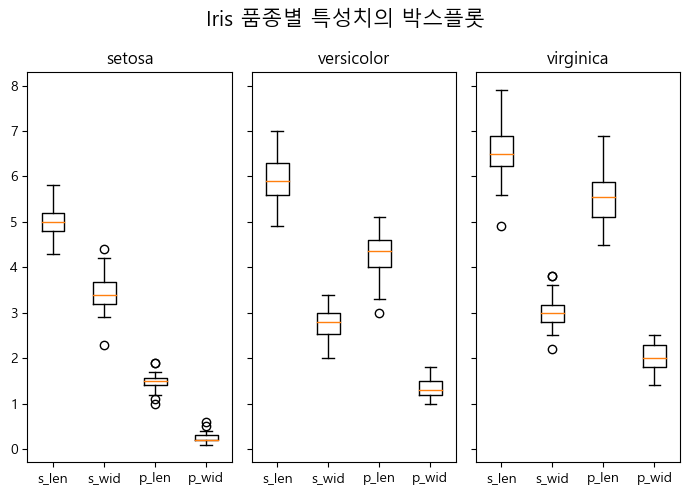

In [42]:
# 방법 2

fig, axes= plt.subplots(1, 3, figsize=(7,5), sharey=True)
for index, species in enumerate(iris.species.unique()): 
    sl = iris[iris.species == species].sepal_length
    sw = iris[iris.species == species].sepal_width
    pl = iris[iris.species == species].petal_length
    pw = iris[iris.species == species].petal_width
    
    ax = axes[index]
    ax.boxplot((sl, sw, pl, pw), 
               labels=['s_len', 's_wid', 'p_len', 'p_wid'])
    ax.set_title(species)
    
fig.suptitle("Iris 품종별 특성치의 박스플롯", fontsize=15)
plt.tight_layout()
plt.show()